# Star Wars Episode V Project
By: Jade Supino

----

Using the Star Wars script from Episode V. Obtained this script from Kaggle.

Refer to the link: https://www.kaggle.com/datasets/xvivancos/star-wars-movie-scripts?select=SW_EpisodeV.txt

### Import Required

In [1]:
import numpy as np

In [2]:
import nltk

In [3]:
import matplotlib.pyplot as plt

In [4]:
from collections import Counter

In [5]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

Download the necessary files for the Natural Language Toolkit

*For this project, I downloaded the most popular*

In [ ]:
#download necessary files from the Natural Language Toolkit (downloaded most popular)
nltk.download()
#if needed: download stopwords from nltk
nltk.download('stopwords')

### Structure the dataset

Create a list where each line is split by the quotes and separated by commas. Then, each line is separated by line number, character name, and dialogue.

Each word in the list becomes lowercased. This is the structured data that is used throughout this project.

*Refer to SW_Dataset.ipynb to view the entire printed out structured dataset.*

In [6]:
#create a list: separated by each line: line number, character name, and dialogue
sw_dic = []
with open("SW_EpisodeV.txt", "r") as text:
    text = text.readlines()[1:]  #skip first line in file
    for line in text:
        line = line.lower().split('"') #lowercase all words and split by quotes
        dialogue = line.pop(5)
        name = line.pop(3)
        line_number = line.pop(1)
        new_obj = {
            "line": line_number,
            "name": name,
            "dialogue": dialogue
        }
        sw_dic.append(new_obj)

### Create a dictionary of character names and line frequency

Create a numpy.ndarray of all the character names. Create a list to store all these names. Then using Counter, find the number of lines each character has and store in a dictionary.

In [7]:
#create a numpy.ndarray of all character names
arr = np.array(sw_dic)

#create a list of all character names
name_column = [row['name'] for row in arr]

#use Counter to count how many lines each character has and convert the list into a dictionary
name_freq = dict(Counter(name_column))
print(name_freq)

{'luke': 128, 'han': 182, 'rieekan': 13, 'leia': 114, 'threepio': 92, 'deck officer': 7, 'assistant officer': 1, 'lieutenant': 2, 'derlin': 3, 'ben': 15, 'zev': 6, 'announcer': 3, 'senior controller': 2, 'piett': 23, 'ozzel': 5, 'vader': 56, 'rebel captain': 1, 'rebel fighter': 1, 'medical droid': 2, 'controller': 3, 'veers': 7, 'hobbie': 1, 'pilots': 1, 'captain': 1, 'woman controller': 1, 'dack': 4, 'trench officer': 3, 'wedge': 8, 'janson': 4, 'head controller': 1, 'officer': 1, 'second officer': 1, 'pilot': 1, 'imperial officer': 2, 'strange voice': 1, 'creature': 21, 'needa': 5, 'emperor': 5, 'yoda': 36, 'first controller': 1, 'second controller': 1, 'boba fett': 4, 'tracking officer': 2, 'communications officer': 2, 'intercom voice': 2, 'lando': 61, 'second threepio': 1, 'man': 1, 'imperial soldier': 1}


-----

### Find the character that has the most lines

Define a function to find the character that speaks the most frequently throughout this episode. This character has the most lines and is the most active.

In [8]:
#function to find the character that speaks the most frequent
def most_frequent(name_column):
    counter = 0
    num = name_column[0]
    for i in name_column:
        freq = name_column.count(i)
        if(freq>counter):
            counter = freq
            num = i
    return num
#print the character with the most lines
print("The most active character in this episode is: ",most_frequent(name_column))

The most active character in this episode is:  han


#### Han is the character in Episode V with the most speaking lines.

------

### Find the top three characters with the most lines

Create a list of the top three characters that have the most lines.

In [9]:
#using Counter to count how many lines each character has
top_char = Counter(name_column)

#create a list of the top three characters that speak the most
top_three = top_char.most_common(3)
print(top_three)

[('han', 182), ('luke', 128), ('leia', 114)]


Convert this list into a dictionary of the top three characters.

In [10]:
#convert the list into a dictionary of top three characters
top_three_dic = dict(top_three)
print(top_three_dic)

{'han': 182, 'luke': 128, 'leia': 114}


Using the dictionary of the top three characters and their line frequency, retrieve the keys and values.

In [11]:
#using top_three_dic, get only the dictionary keys (top 3 character names)
top_three_keys = top_three_dic.keys()
print(top_three_keys)

dict_keys(['han', 'luke', 'leia'])


In [12]:
#using top_three_dic, get only the dictionary values (how many lines each character has)
top_three_values = top_three_dic.values()
print(top_three_values)

dict_values([182, 128, 114])


Using the keys and values from the top_three_dic dictionary, create a pie chart comparing the top three characters and their line frequency.

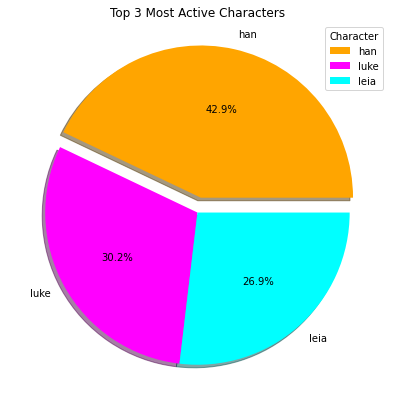

In [13]:
#create a pie chart of the top 3 most active characters
mycolors = ["orange", "magenta", "cyan"]
myexplode = (0.1, 0, 0) 
fig = plt.figure(figsize = (10,7))
plt.pie(top_three_values, labels = top_three_keys, autopct='%1.1f%%', shadow = True, colors = mycolors, explode = myexplode)
plt.title("Top 3 Most Active Characters")
plt.legend(title = "Character")
plt.show()

----

### Compare the characters and their line frequency

Using the dictionary of all character names and line frequency, retrieve the keys and values.

In [14]:
#using name_freq, get only the dictionary keys (character names)
char_name_dic = name_freq.keys()
print(char_name_dic)

dict_keys(['luke', 'han', 'rieekan', 'leia', 'threepio', 'deck officer', 'assistant officer', 'lieutenant', 'derlin', 'ben', 'zev', 'announcer', 'senior controller', 'piett', 'ozzel', 'vader', 'rebel captain', 'rebel fighter', 'medical droid', 'controller', 'veers', 'hobbie', 'pilots', 'captain', 'woman controller', 'dack', 'trench officer', 'wedge', 'janson', 'head controller', 'officer', 'second officer', 'pilot', 'imperial officer', 'strange voice', 'creature', 'needa', 'emperor', 'yoda', 'first controller', 'second controller', 'boba fett', 'tracking officer', 'communications officer', 'intercom voice', 'lando', 'second threepio', 'man', 'imperial soldier'])


In [15]:
#using name_freq, get only the dictionary values (how many lines each character has)
freq_dic = name_freq.values()
print(freq_dic)

dict_values([128, 182, 13, 114, 92, 7, 1, 2, 3, 15, 6, 3, 2, 23, 5, 56, 1, 1, 2, 3, 7, 1, 1, 1, 1, 4, 3, 8, 4, 1, 1, 1, 1, 2, 1, 21, 5, 5, 36, 1, 1, 4, 2, 2, 2, 61, 1, 1, 1])


Using the keys and values from the name_freq dictionary, create a bar chart comparing the characters and their line frequency.

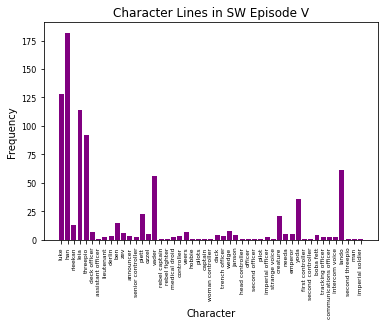

In [16]:
#create a bar chart comparing characters and the number of lines they have
Character = char_name_dic 
Frequency = freq_dic 
plt.bar(Character, Frequency, color=['purple'])
plt.title('Character Lines in SW Episode V')
plt.xlabel('Character', labelpad= -10)
plt.xticks(rotation = 'vertical')
plt.xticks(fontsize= 6)
plt.ylabel('Frequency')
plt.yticks(fontsize = 8)
plt.show()

----

### Create a list of all the dialogue and remove all punctuation

Create a numpy.ndarray of all the dialogue spoken throughout the episode. Create a list to store all the dialogue.

In [17]:
#create a numpy.ndarray of the dialogue
dialogue_arr = np.array(sw_dic)

#convert it into a list of the dialogue
char_lines = [row['dialogue'] for row in dialogue_arr]

To use the dialogue, it is important to remove all punctuation. First, remove all outer punctuation.

In [18]:
#remove outer punctuation
import string
excluded = set(string.punctuation)
char_lines = ' '.join(ch for ch in char_lines if ch not in excluded)

After removing the outer punctuation, the inner punctuation must also be removed.

In [19]:
#remove the rest of the punctuation
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
no_punc_lines = " "
for char_punc in char_lines:
    if char_punc not in punc:
        no_punc_lines = no_punc_lines + char_punc
no_punc_lines = no_punc_lines

### Remove all stopwords from dialogue

Now, all stopwords must be removed from the dialogue. These stopwords are words that do not add much meaning to this analysis, and therefore are unnecessary.

Remove all stopwords using nltk and store it in a list.

In [20]:
#remove stopwords from the dialogue
stopWords = set(stopwords.words('english'))
words = word_tokenize(no_punc_lines)
filtered_dialogue = []

for w in words:
    if w not in stopWords:
        filtered_dialogue.append(w)

Create a list of the 20 most common words used throughout the episode.

In [21]:
#use Counter to create a list of the 20 most common words spoken
Count_no = Counter(filtered_dialogue)
common_words = Count_no.most_common(20)
print(common_words)

[('dont', 66), ('im', 61), ('oh', 42), ('well', 41), ('yes', 40), ('right', 38), ('sir', 38), ('know', 36), ('going', 35), ('get', 33), ('good', 31), ('see', 29), ('go', 28), ('lord', 28), ('come', 27), ('artoo', 27), ('chewie', 26), ('youre', 25), ('luke', 25), ('like', 25)]


----

### Create a dictionary of the 20 most common words and their frequency

Convert the list of the 20 most common words into a dictionary.

In [22]:
#Convert the list into a dictionary of the 20 most common words
common_words_dic = dict(common_words)
print(common_words_dic)

{'dont': 66, 'im': 61, 'oh': 42, 'well': 41, 'yes': 40, 'right': 38, 'sir': 38, 'know': 36, 'going': 35, 'get': 33, 'good': 31, 'see': 29, 'go': 28, 'lord': 28, 'come': 27, 'artoo': 27, 'chewie': 26, 'youre': 25, 'luke': 25, 'like': 25}


### Compare the 20 most common words spoken in Episode V

Using the dictionary of the 20 most common words and their frequency, retrieve the keys and values.

In [23]:
#using common_words_dic, get only the dictionary keys (words)
most_freq_words_used = common_words_dic.keys()
print(most_freq_words_used)

dict_keys(['dont', 'im', 'oh', 'well', 'yes', 'right', 'sir', 'know', 'going', 'get', 'good', 'see', 'go', 'lord', 'come', 'artoo', 'chewie', 'youre', 'luke', 'like'])


In [24]:
#using common_words_dic, only the dictionary values (how often the word occurs)
most_freq_words_used_values = common_words_dic.values()
print(most_freq_words_used_values)

dict_values([66, 61, 42, 41, 40, 38, 38, 36, 35, 33, 31, 29, 28, 28, 27, 27, 26, 25, 25, 25])


Using the keys and values from the common_words_dic dictionary, create a bar chart comparing the 20 most common words spoken and their frequency.

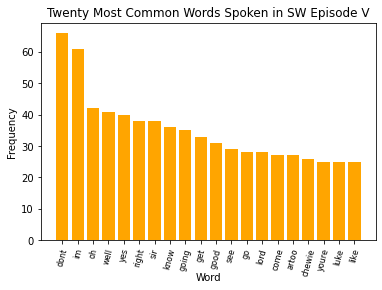

In [25]:
#create a bar chart comparing 20 most common words and how often they occur
Word = most_freq_words_used
Word_Frequency = most_freq_words_used_values
plt.bar(Word, Word_Frequency, color=['orange'])
plt.title('Twenty Most Common Words Spoken in SW Episode V')
plt.xlabel('Word', labelpad= -4)
plt.xticks(rotation = 75)
plt.xticks(fontsize= 8)
plt.ylabel('Frequency')
plt.yticks(fontsize = 10)
plt.show()

#### As shown above, the most common word used throughout the episode is "dont".

----

### Summary

Using the Star Wars Episode V script, obtained from Kaggle, important information from this episode can be retrieved using Python. After installing the required Python packages and importing the necessary files from these packages, the user can begin their required analyses.

After viewing the unstructured script and noticing the first line in the script was "character" "dialogue", removing this line is important as it is not necessary for the analysis. The structured dataset is all lowercase, split by each line and organized by line number, character name, and dialogue. The structured dataset is stored in a **list**.


A **numpy.ndarray** is created using all the character names. Storing these names in a **list** and using Counter from collections to count the number of lines each character speaks. This list is converted into a **dictionary** of each character name and their line frequency.

To find the most active character, a **function** is created using the dictionary. **The most active character in this episode is Han.** Han has the most speaking lines out of all the characters.

Using most.common(3), the top three characters from the dictionary can be retrieved and stored in a new **list**, which is converted into a new **dictionary**. The dictionary consists of the three most active character names and their line frequency. **The top three most active characters are Han, Luke, and Leia.** The three top characters can be plotted in a pie chart using matplotlib. As one can easily see, Han is the most active character out of the three. Luke is the second most active, and then Leia. This also validates that the most active character is Han, which was found using the function created before.

There are many different characters in this episode. Using the dictionary initally created with all the character names and their line frequency, a bar chart can be created. Using matplotlib, each character and their number of lines can be plotted and easily compared. As one can easily see, **Han is still the most active character. The bar chart also validates that Luke is the second most active character and Leia is the third.**


Now that the characters have been analyzed, the dialogue can also be analyzed. A **numpy.ndarray** is created using all the dialogue in this episode. *Remember, the first line of the script "character" "dialogue" was removed.* All the dialogue is stored in a **list**. Then, all the punctuation is removed. This is performed twice because the first time, only the outer punctuation is removed. To remove the inner punctuation, it is performed again.

It is important to note that in any script, there are very common words used, such as "the", "a", "an", etc. These words do not add much meaning to the analysis and therefore must be removed. By using the Natural Language Toolkit, this has been made very simple! Stopwords can be downloaded from nltk and used to remove all stopwords from the dialogue. After removing all stopwords, it is stored in a **list**.

To find the 20 most common words spoken throughout this episode, use Counter from collections, to count how many times each word is used. Using most.common(20), the 20 most common words will be retrieved and stored in a **list**. This list is converted into a **dictionary** so that a bar chart can be created comparing the words and their frequency. Using matplotlib, the words and their frequency can easily be compared. As one can easily see, **the most common word used throughout the episode is "dont".**

By structuring the Star Wars script and utilizing these Python packages, the user can analyze important parts of the script. Finding all the character names and the number of lines they speak throughout this episode and comparing them using a bar chart. Finding who the most active character is and the top three most active characters. Validating that the characters match in each instance. Along with this, using the dialogue to find the 20 most common words spoken throughout the episode. Comparing these words using matplotlib and finding the most common word. This program lets the user retrieve and analyze important parts of the Star Wars Episode V script.